# ####################################################################

# VAC Mini Project - Loan Eligibility Prediction 
#### Team Members: 
##### R.VEERALOCHANI - RA1911027020014 
##### E.DHATCHAYINI - RA1911027020026
##### S.VINAYA - RA1911027020028


### The steps that we have performed are as follows: 
##### 1) Gathering the data 
##### 2) Exploratory data analysis 
##### 3) Data Visualization 
##### 4) ML Model Decision 
##### 5) Training the ML model 
##### 6) Predicting the ML model 
##### 7) Deployment of the model

## Import the packages

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os

for dirname, _, filenames in os.walk('C:\\Users\\VEERARAMESH\\Documents\\ALL PROJECT RELATED STUFF\\VAC MINI PROJECT'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\loan-test.csv
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\loan-train.csv
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\logistic_model.pkl
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\Screenshot 2022-04-14 195631.png
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\VAC Mini Project .ipynb
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\VAC Mini Project Markdown.ipynb
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\.ipynb_checkpoints\VAC Mini Project Markdown-checkpoint.ipynb
C:\Users\VEERARAMESH\Documents\ALL PROJECT RELATED STUFF\VAC MINI PROJECT\.ipynb_checkpoints\VAC Mini Project Markup-checkpoint.ipynb


In [3]:
import warnings
warnings.simplefilter('ignore')

## Gathering the data

In [4]:
#  Create New Variable and stores the dataset values as Data Frame

loan_train = pd.read_csv("C:\\Users\\VEERARAMESH\\Documents\\ALL PROJECT RELATED STUFF\\VAC MINI PROJECT\\loan-train.csv")
loan_test = pd.read_csv("C:\\Users\\VEERARAMESH\\Documents\\ALL PROJECT RELATED STUFF\\VAC MINI PROJECT\\loan-test.csv")

""" Dataset Information:
Loan_ID--------------> Unique Loan ID ,
Gender --------------> Male/ Female ,
Married --------------> Applicant married (Y/N) ,
Dependents ------------> Number of dependents ,
Education -------------> Applicant Education (Graduate/ Under Graduate) ,
Self_Employed ---------> Self-employed (Y/N) ,
ApplicantIncome -------> Applicant income ,
CoapplicantIncome -----> Coapplicant income ,
LoanAmount -----------> Loan amount in thousands ,
Loan_Amount_Term ------> Term of a loan in months ,
Credit_History --------> Credit history meets guidelines ,
Property_Area ---------> Urban/ Semi-Urban/ Rural ,
Loan_Status -----------> Loan approved (Y/N) """

In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
print("Rows: ", len(loan_train))

Rows:  614


In [8]:
print("Columns: ", len(loan_train.columns))

Columns:  13


In [9]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


In [10]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Understanding the data

In [11]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### From the above o/p,we can see that some columns have null values like 'Gender', 'Married' etc (these null values have to replaced with mean,mode further) and there are 3 datatypes: float,int,object.

## Exploratory data analysis

In [13]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [14]:
# Now, Test and Call a function for gender only
explore_object_type(loan_train, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [15]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


#### Now we need to fill the null values with mean and median using missingno package

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [17]:
import missingno as msno

In [18]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

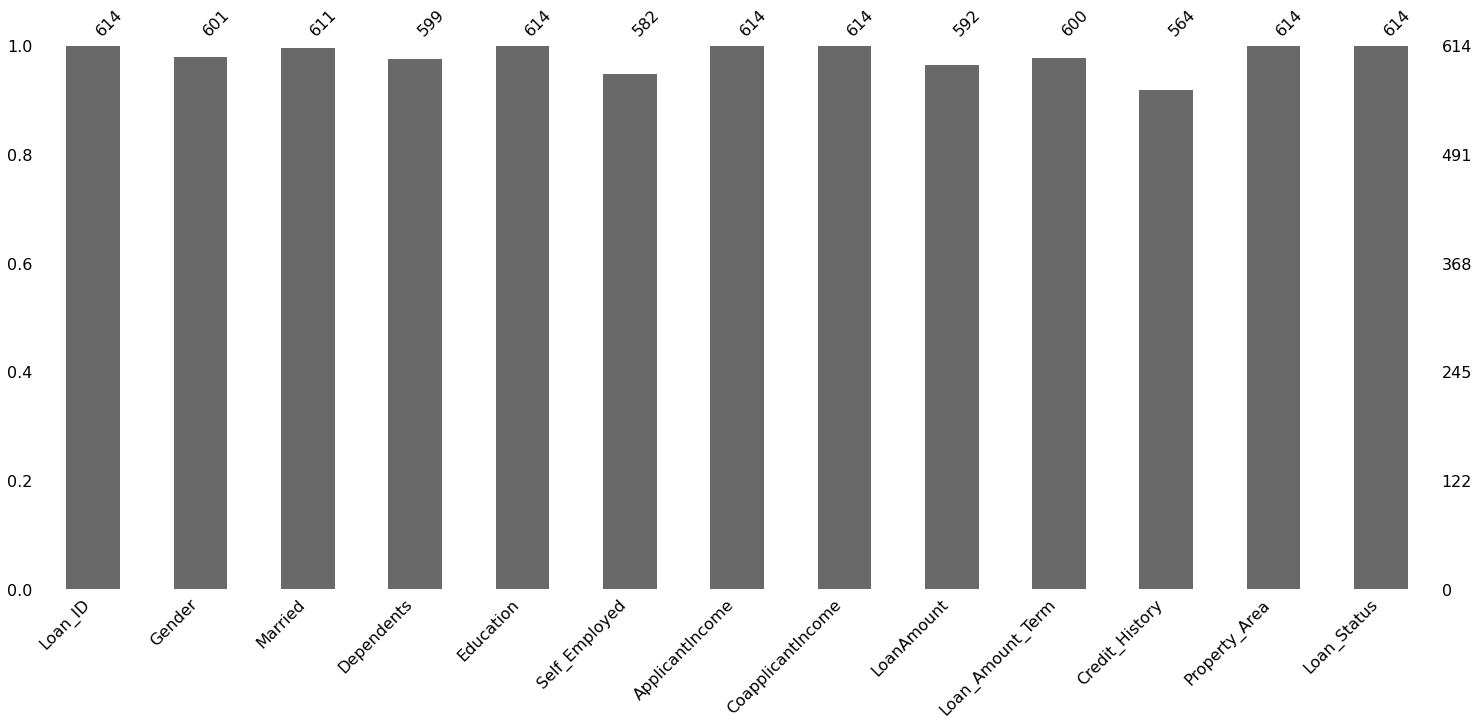

In [19]:
#plotting non null values
msno.bar(loan_train)

<AxesSubplot:>

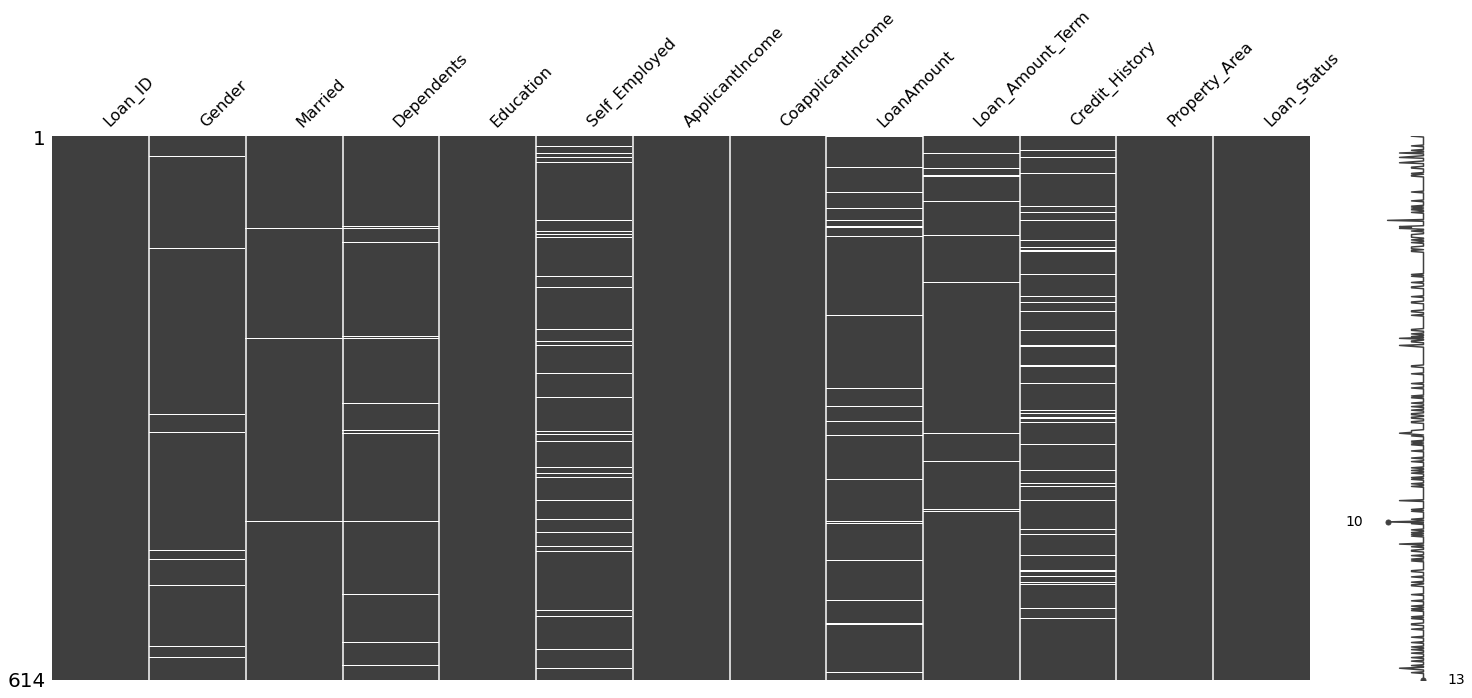

In [20]:
#number of lines = number of null values
msno.matrix(loan_train )

##### As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.

In [21]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

## Converting categorical values to numerical values

In [22]:
# For 'Loan_Status' feature,we are replacing 'Y' values with 1 and 'N' values with 0 respectively and same has been done for other Boolean types of columns

loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [23]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

##### Here in our dataset ,'Property_Area', 'Dependents' and 'Education' has multiple values, so now we can use LabelEncoder from sklearn package

In [24]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

#### Now finally, we have all the features with numerical values. So, now its easy to visualize the data.

## Data Visualization

In [25]:
#Importing the packages

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

In [26]:
import sklearn as sk

In [27]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


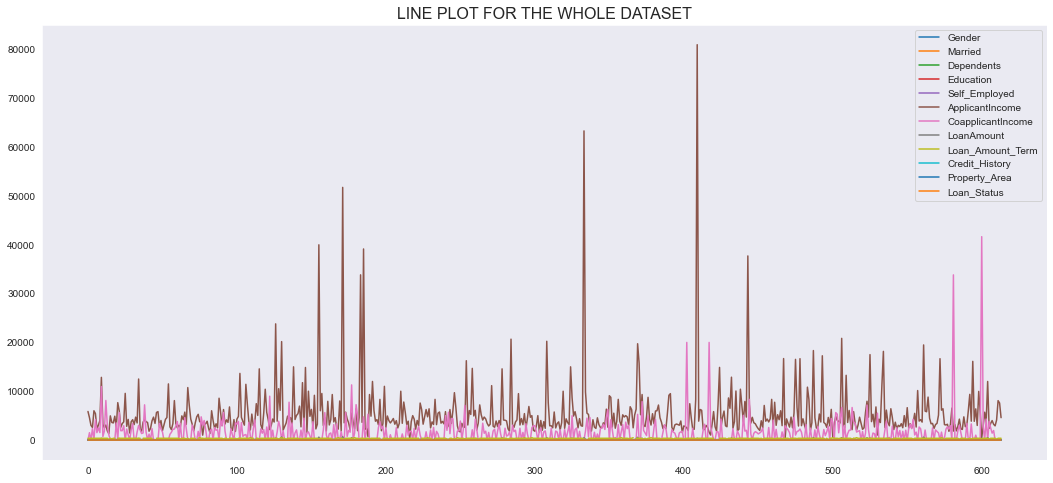

In [28]:
loan_train.plot(figsize=(18, 8))
plt.title('LINE PLOT FOR THE WHOLE DATASET',fontsize=16)
plt.show()

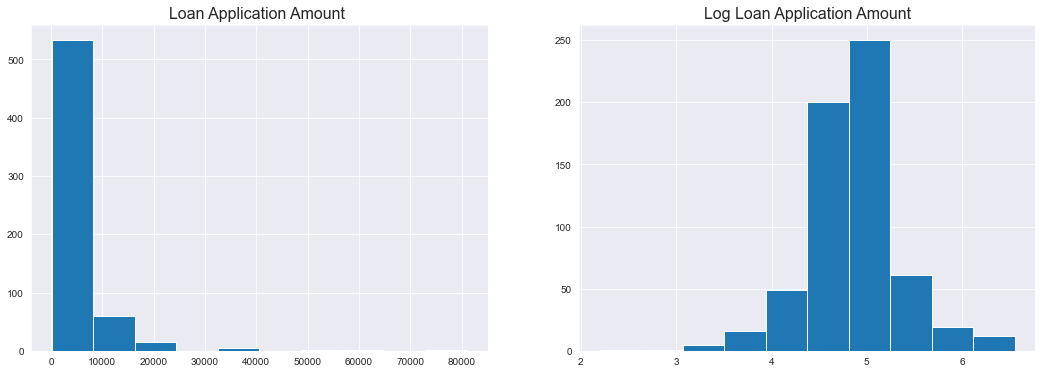

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ",fontsize=16)

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount",fontsize=16)

plt.show()

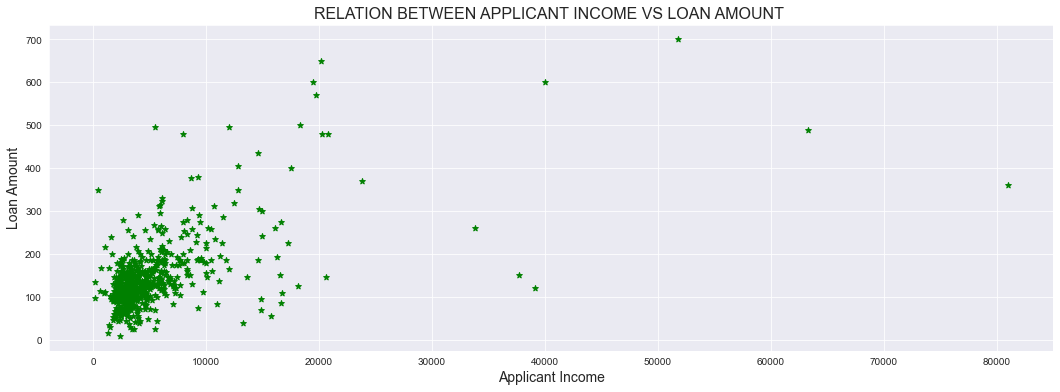

In [30]:
plt.figure(figsize=(18, 6))
plt.title("RELATION BETWEEN APPLICANT INCOME VS LOAN AMOUNT ",fontsize=16)

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='green', marker='*')
plt.xlabel("Applicant Income",fontsize=14)
plt.ylabel("Loan Amount",fontsize=14)
plt.show()

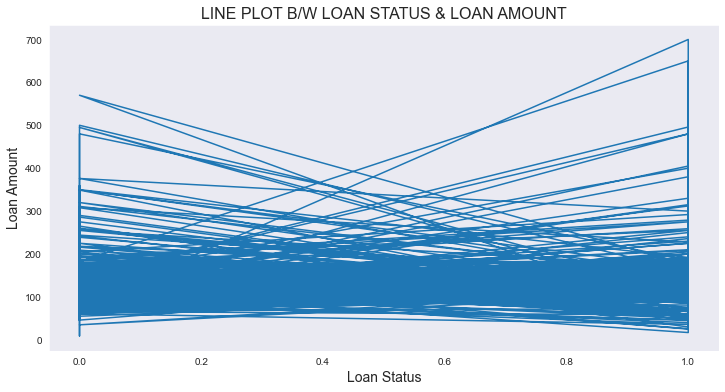

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("LINE PLOT B/W LOAN STATUS & LOAN AMOUNT",fontsize=16)
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)
plt.show()

In [32]:
loan_train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:title={'center':'VIOLIN PLOT'}, ylabel='ApplicantIncome'>

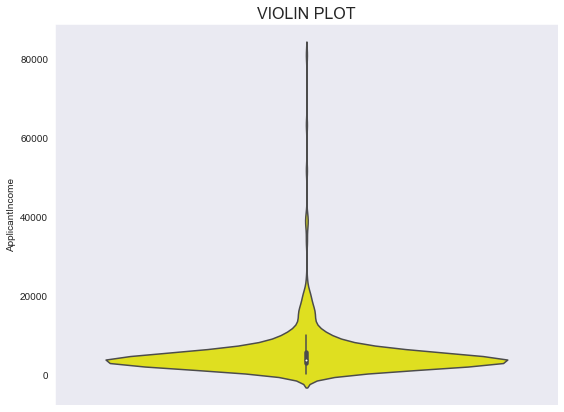

In [33]:
#Violin PLot
fig, ax = plt.subplots(figsize =(9, 7))
plt.title("VIOLIN PLOT",fontsize=16)
sns.violinplot( ax = ax, y = loan_train["ApplicantIncome"], color="yellow")

##### From the above violin plot , we can conclude that the data is positively skewed or right skewed 

<AxesSubplot:title={'center':'STRIP PLOT'}, xlabel='Credit_History', ylabel='LoanAmount'>

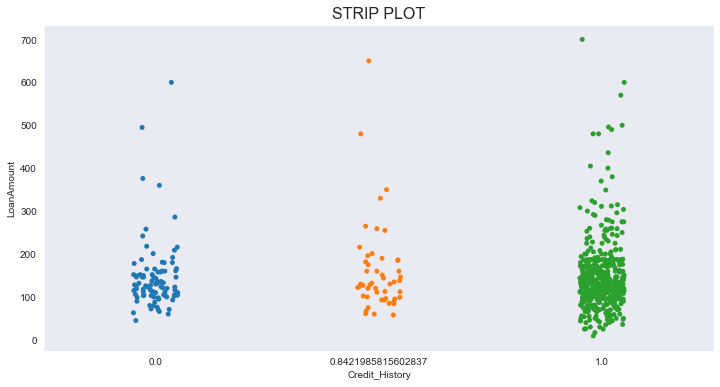

In [34]:
#Strip Plot
plt.figure(figsize=(12, 6))
plt.title("STRIP PLOT",fontsize=16)
sns.stripplot(x="Credit_History", y="LoanAmount", data=loan_train)

##### From the above plot ,we can interpret that the loan amount is max when the credit history is 1, min when the credit history is 0

<AxesSubplot:title={'center':'SWARM PLOT'}, xlabel='Gender', ylabel='LoanAmount'>

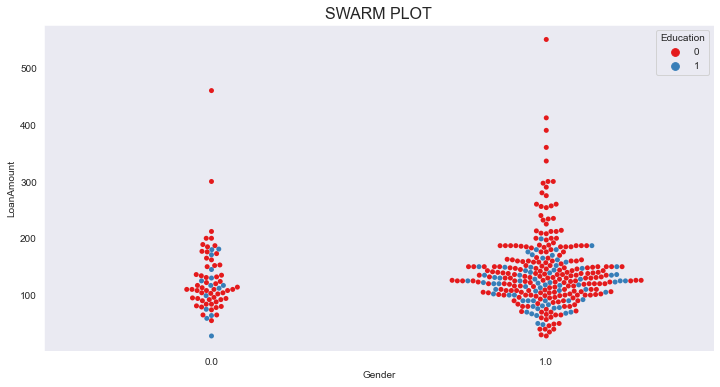

In [35]:
#Swarm Plot
plt.figure(figsize=(12, 6))
plt.title("SWARM PLOT",fontsize=16)
sns.swarmplot(x="Gender", y="LoanAmount", data=loan_test, palette="Set1",hue="Education")

##### From the above plot we can interpret that the loans have been sanctioned mostly to the graduated people and loan amount of 150 dollars(approx) has been given in majority to the male graduates whereas loan amount of 120 dollars(approx) has been given  in majority to the female graduates.

In [36]:
# Reading selective rows from a dataset
nRowsRead = 100
df1 = pd.read_csv('loan-train.csv', delimiter=',', nrows = nRowsRead)

<Figure size 1440x720 with 0 Axes>

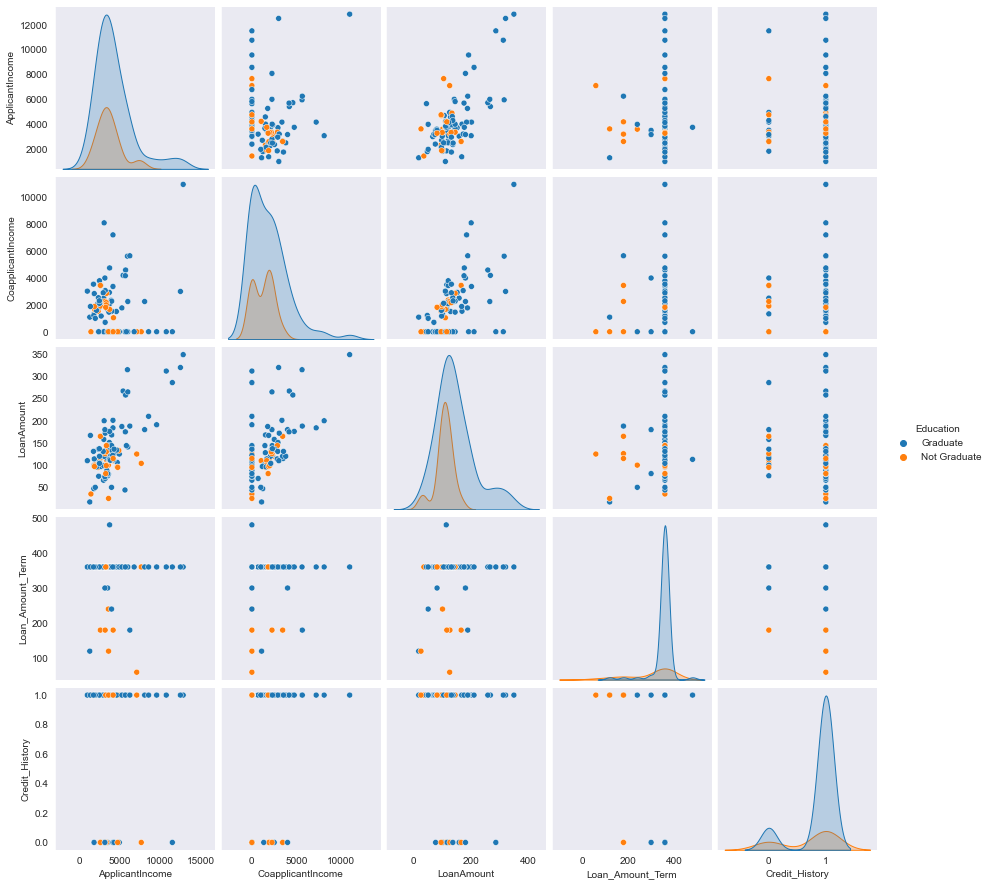

In [37]:
# Pair Plot
plt.figure(figsize=(20, 10))
sns.pairplot(data=df1, hue ='Education')
#sns.pairplot(df1)

<Figure size 2160x576 with 0 Axes>

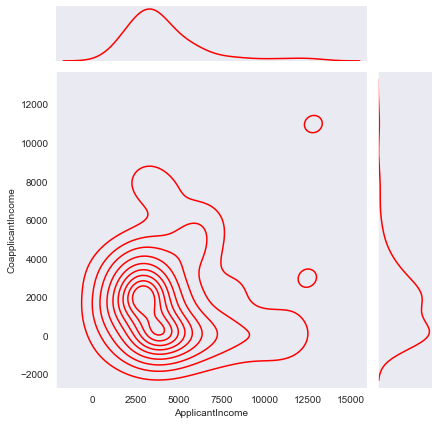

In [38]:
#Joint Plot1
plt.figure(figsize=(30,8))
sns.jointplot(x = "ApplicantIncome", y = "CoapplicantIncome",kind = "kde", data = df1,color="red")

##### We can see that the density of the plot is more in between the range of 6000 in x-axis and 4000 in the y-axis , the two small circles in the plot denotes the outliers , the skewness plot shows that the data is positively skewed when it is plot between applicant income in the x-axis and co-applicant income in the y-axis.

<Figure size 2160x576 with 0 Axes>

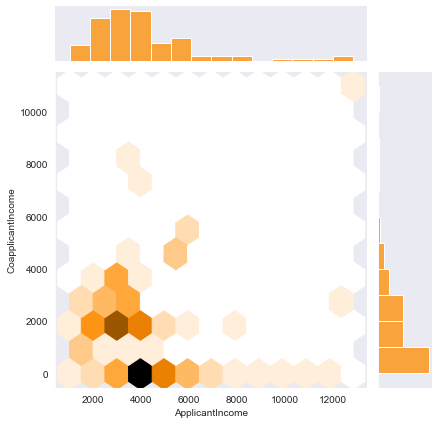

In [39]:
#Joint Plot2 
plt.figure(figsize=(30,8))
sns.jointplot(x = "ApplicantIncome", y = "CoapplicantIncome",kind = "hex", data = df1,color="darkorange")

##### This plot assures the above inference (Joint Plot1), this shows that the density is more between 4000 and 6000 in the x-axis

<AxesSubplot:title={'center':'PIE CHART'}, ylabel='Property_Area'>

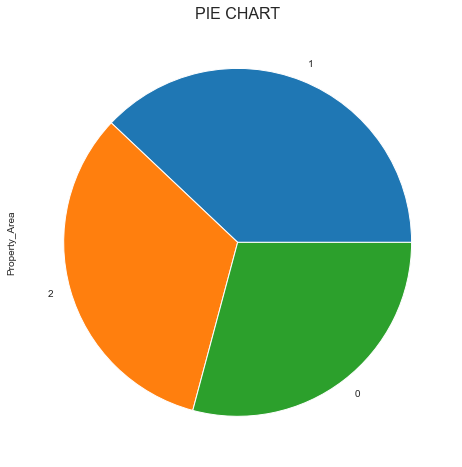

In [40]:
plt.figure(figsize=(15,8))
plt.title("PIE CHART",fontsize=16)
loan_train.Property_Area.value_counts().plot(kind="pie")

##### From the above pie chart we can infer that the number of semiurban area is maximum (approx 40%), urban area is approx 35% and the number of rural areas is approx 25% of the total number of properties.

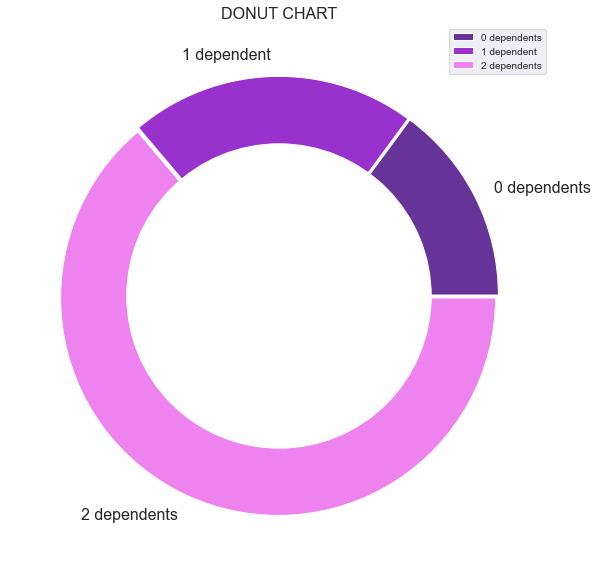

In [41]:
#Donut Chart 
loanamountterm=['84','120','360']
colors=['rebeccapurple','darkorchid','violet']
explode = (0.01, 0.01, 0.01)
dependent=['0 dependents','1 dependent','2 dependents']
plt.figure(figsize=(20,10))
plt.title("DONUT CHART",fontsize=16)
plt.pie(loanamountterm,labels=dependent,colors=colors,explode=explode, textprops={'fontsize': 16})
plt.legend(loc="upper right", title="")
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

##### From the above donut chart we can infer that for people with more number of dependents or for people with a bigger family the loan amount term seems to be more.

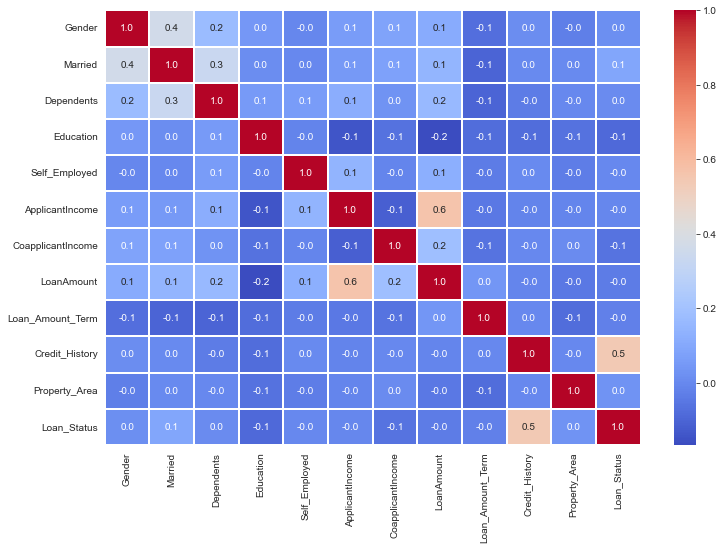

In [42]:
#Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## Choosing the ML Model-Logistic Regression

In [43]:
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [44]:
logistic_model = LogisticRegression()

## Training the ML model

##### Before fitting the model, we need to decide how many features are available for testing and training, then after that we have to complete this step--> fit the model.Currently, we are using 'Credit_History', 'Education', 'Gender' features for training so let's create train and test variables.

In [45]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [46]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

## Predicting the ML model

In [47]:
# Predict the model for testing data

predicted = logistic_model.predict(x_test)

In [48]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [49]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [50]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [51]:
# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data \n',predict_test) 

Target on test data 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


### Deployment of the model

In [52]:
import pickle as pkl

In [53]:
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

##### After performing the above step, we can see the directory with the file named 'logistic_model.pkl'

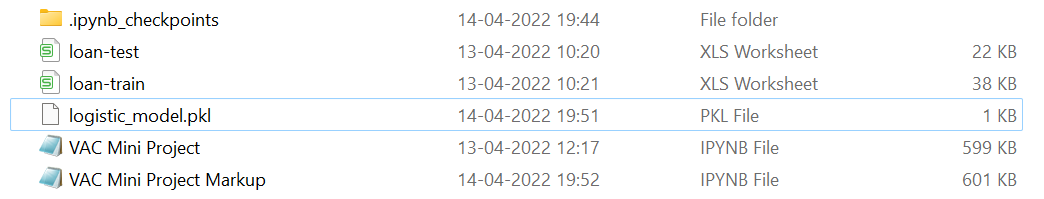

# ####################################################################